<a href="https://colab.research.google.com/github/Ridham-Shah-25/Best_Accomodation_Recommender/blob/Ridham-Shah-25-patch-1/Best_Accomodation_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv('food_coded.csv')
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


**Data Exploration and Visualisation**

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


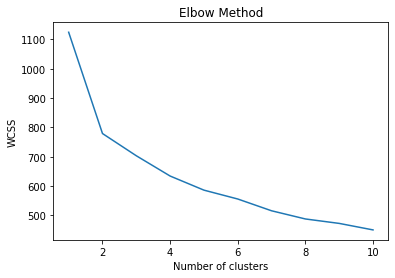

In [99]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
final_dataset=df[["calories_day","diet_current_coded","fav_cuisine_coded","sports","exercise","pay_meal_out","fruit_day","cook","eating_out","income"]]
final_dataset.dropna(axis=0,inplace=True)
final_dataset.to_csv('food_choices.csv')
X=final_dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**K-Means Clustering**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/

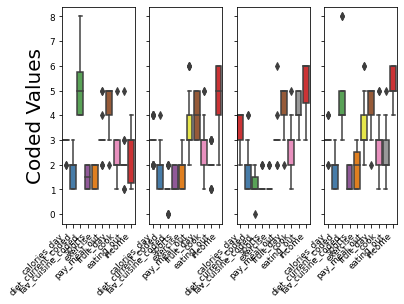

In [89]:
#K-Means clustering on cleaned data
k = 4
kmeans1 = KMeans(n_clusters = k, random_state=0).fit(final_dataset)
final_dataset['Cluster']=kmeans1.labels_


#Plotting Boxplot for optimal K value (K=4)
fig, axes = plt.subplots(1, k,sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=20)

for i in range(k):
     plt.sca(axes[i])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(palette="Set1",data = final_dataset[final_dataset['Cluster'] == i].drop('Cluster',1), ax=axes[i]).tick_params(labelsize=8.7)
        
plt.show()

**Using Foursquare API to get Geo-Locational data**

In [91]:
from pandas import json_normalize
import folium
import csv,json
from geopy.geocoders import Nominatim 
import requests

url = "https://api.foursquare.com/v3/places/search?query=hostel&ll=18.5204%2C73.8567&radius=100000&limit=50"

headers = {
    "Accept": "application/json",
    "Authorization": "fsq3sABeACwVHTJTqVgPeNRnEgQtNKwjJQQRorZt/b5vPLc="
}
response = requests.get(url, headers=headers).json()
d=json_normalize(response['results'])
d.to_csv('hostels.csv')

In [92]:
venues = response['results']
nearby_venues = json_normalize(venues)
req_dataset=nearby_venues[['name','geocodes.main.latitude','geocodes.main.longitude']]
req_dataset.dropna(axis=0,inplace=True)
pd.set_option('display.max_rows', None)
print(req_dataset)

                             name  geocodes.main.latitude  \
0                COEP Boys Hostel               18.528204   
1                 HND Jain Hostel               18.533640   
2                  Prakash Hostel               18.521745   
3              Vidyalankar Hostel               18.517606   
4                     COEP Hostel               18.529054   
5   Nurses Hostel Bjmc and Sasson               18.523150   
6                Backpacker Panda               18.537828   
7                     Hotel Lotus               18.536393   
8                    Palm Grooves               18.522934   
9                Hotel Sudharshan               18.543388   
10           Sinhgad Girls Hostel               18.469502   
11            Arirang Guest House               18.563546   
12                Sinhgad vadgaon               18.463010   
13                   Mhada hostel               18.572831   
14      Zoya classic boy's hostel               18.445133   
15                      

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [93]:

url1 = "https://api.foursquare.com/v3/places/search?query=residential%20location&ll=18.5204%2C73.8567&radius=100000&limit=50"

headers1 = {
    "Accept": "application/json",
    "Authorization": "fsq3sABeACwVHTJTqVgPeNRnEgQtNKwjJQQRorZt/b5vPLc="
}

response1 = requests.get(url1, headers=headers1).json()
d1=json_normalize(response1['results'])
d1.to_csv('residential_location.csv')
venues1 = response1['results']
nearby_venues1 = json_normalize(venues1)
# print(nearby_venues)
req_dataset1=nearby_venues1[['name','geocodes.main.latitude','geocodes.main.longitude']]
req_dataset1.dropna(axis=0,inplace=True)
pd.set_option('display.max_rows', None)

url2 = "https://api.foursquare.com/v3/places/search?query=PG&ll=18.5204%2C73.8567&radius=100000&limit=50"

headers2 = {
    "Accept": "application/json",
    "Authorization": "fsq3sABeACwVHTJTqVgPeNRnEgQtNKwjJQQRorZt/b5vPLc="
}

response2 = requests.get(url2, headers=headers2).json()
d2=json_normalize(response2['results'])
d2.to_csv('pgs.csv')
venues2 = response2['results']
nearby_venues2 = json_normalize(venues2)
req_dataset2=nearby_venues2[['name','geocodes.main.latitude','geocodes.main.longitude']]
req_dataset2.dropna(axis=0,inplace=True)
pd.set_option('display.max_rows', None)

datasets=[req_dataset,req_dataset1,req_dataset2]
final_dataset=pd.concat(datasets,ignore_index=True)
final_dataset['Groceries']=0
final_dataset['Restaurants']=0
final_dataset['Gyms']=0
print(final_dataset)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


                                                  name  \
0                                     COEP Boys Hostel   
1                                      HND Jain Hostel   
2                                       Prakash Hostel   
3                                   Vidyalankar Hostel   
4                                          COEP Hostel   
5                        Nurses Hostel Bjmc and Sasson   
6                                     Backpacker Panda   
7                                          Hotel Lotus   
8                                         Palm Grooves   
9                                     Hotel Sudharshan   
10                                Sinhgad Girls Hostel   
11                                 Arirang Guest House   
12                                     Sinhgad vadgaon   
13                                        Mhada hostel   
14                           Zoya classic boy's hostel   
15                                            Shivneri   
16            

In [94]:
latitudes = list(final_dataset['geocodes.main.latitude'])
longitudes = list(final_dataset['geocodes.main.longitude'])
row=0
for lat, lng in zip(latitudes, longitudes):
    latitude=lat
    longitude=lng

    url = "https://api.foursquare.com/v3/places/search"

    params_restaurant = {
  	"query": "restaurant",
  	"ll": f"{latitude},{longitude}",
    "limit":50,
    "radius":1000
    }

    headers = {
    "Accept": "application/json",
    "Authorization": "fsq3sABeACwVHTJTqVgPeNRnEgQtNKwjJQQRorZt/b5vPLc="
    }

    result = requests.get(url, headers=headers,params=params_restaurant)
    results_department=result.json()
    if(len(results_department['results'])!=0):
      venues=json_normalize(results_department['results'])
      final_dataset.loc[row,['Restaurants']]=[venues['name'].count()]

    params_department = {
   	"query": "grocery-store",
   	"ll":f"{latitude},{longitude}",
    "limit":50,
    "radius":1000
     }

    result1 = requests.get(url, headers=headers,params=params_department)
    results_department1=result1.json()
    if(len(results_department1['results'])!=0):
      venues1=json_normalize(results_department1['results'])
      final_dataset.loc[row,['Groceries']]=[venues1['name'].count()]

    params_gyms = {
   	"query": "gym",
   	"ll":f"{latitude},{longitude}",
    "limit":50,
    "radius":1000
     }

    result2 = requests.get(url, headers=headers,params=params_gyms)
    results_department2=result2.json()
    if(len(results_department2['results'])!=0):
      venues2=json_normalize(results_department2['results'])
      final_dataset.loc[row,['Gyms']]=[venues2['name'].count()]
    row+=1
final_dataset

,name,geocodes.main.latitude,geocodes.main.longitude,Groceries,Restaurants,Gyms
0,COEP Boys Hostel,18.528204,73.851891,9,50,8
1,HND Jain Hostel,18.533640,73.835514,9,50,21
2,Prakash Hostel,18.521745,73.858898,50,50,11
3,Vidyalankar Hostel,18.517606,73.852909,50,50,20
4,COEP Hostel,18.529054,73.852244,4,50,6
5,Nurses Hostel Bjmc and Sasson,18.523150,73.870380,26,50,8
6,Backpacker Panda,18.537828,73.894481,3,50,13
7,Hotel Lotus,18.536393,73.897353,4,50,12
8,Palm Grooves,18.522934,73.908295,6,17,4
9,Hotel Sudharshan,18.543388,73.903897,5,50,24


In [95]:
names_list=final_dataset['name'].tolist()
final_dataset.drop('name',inplace=True,axis=1)
final_dataset

,geocodes.main.latitude,geocodes.main.longitude,Groceries,Restaurants,Gyms
0,18.528204,73.851891,9,50,8
1,18.533640,73.835514,9,50,21
2,18.521745,73.858898,50,50,11
3,18.517606,73.852909,50,50,20
4,18.529054,73.852244,4,50,6
5,18.523150,73.870380,26,50,8
6,18.537828,73.894481,3,50,13
7,18.536393,73.897353,4,50,12
8,18.522934,73.908295,6,17,4
9,18.543388,73.903897,5,50,24


In [96]:
print(type(final_dataset))
from tabulate import tabulate
#Run K-means clustering on dataframe
kclusters = 4

kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(final_dataset)
final_dataset['Cluster']=kmeans2.labels_
final_dataset['Cluster']=final_dataset['Cluster'].apply(str)

print(tabulate(final_dataset,headers='keys',tablefmt='github'))

<class 'pandas.core.frame.DataFrame'>
|     |   geocodes.main.latitude |   geocodes.main.longitude |   Groceries |   Restaurants |   Gyms |   Cluster |
|-----|--------------------------|---------------------------|-------------|---------------|--------|-----------|
|   0 |                  18.5282 |                   73.8519 |           9 |            50 |      8 |         0 |
|   1 |                  18.5336 |                   73.8355 |           9 |            50 |     21 |         3 |
|   2 |                  18.5217 |                   73.8589 |          50 |            50 |     11 |         2 |
|   3 |                  18.5176 |                   73.8529 |          50 |            50 |     20 |         2 |
|   4 |                  18.5291 |                   73.8522 |           4 |            50 |      6 |         0 |
|   5 |                  18.5232 |                   73.8704 |          26 |            50 |      8 |         0 |
|   6 |                  18.5378 |                

**Plotting the clustered locations on a map**

In [97]:
map_bom=folium.Map(location=[18.5204,73.8567],zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    elif cluster=='2':
      return 'red'
    else:
      return 'blue'

latitudes = list(final_dataset['geocodes.main.latitude'])
longitudes = list(final_dataset['geocodes.main.longitude'])
labels = list(final_dataset['Cluster'])
names=names_list
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bom)

# add locations to map
map_bom.add_child(locations)
folium.Marker([18.5204,73.8567],popup='Pune').add_to(map_bom)

#saving the map 
map_bom.save("Pune.html")